   petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2
Unique Labels: [0 1 2]
Training samples: 105, Test samples: 45
   petal length (cm)  petal width (cm)
0          -0.182950         -0.293181
1           0.930661          0.737246
2           1.042022          1.638870
3           0.652258          0.350836
4           1.097702          0.737246
Training accuracy: 0.95
Test accuracy: 0.98


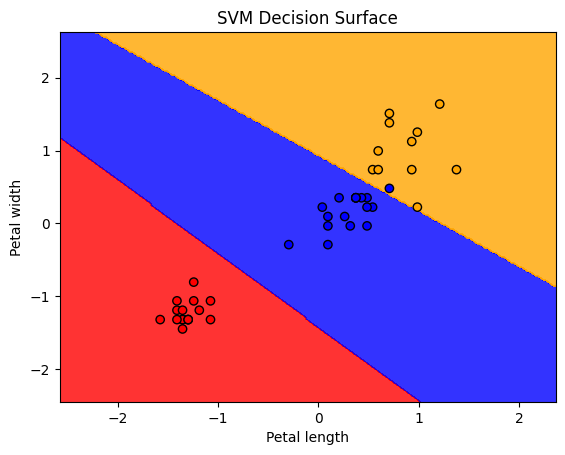

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris_data = datasets.load_iris()
X = iris_data.data[:, [2, 3]]  # Petal length and width
y = iris_data.target

iris_dataframe = pd.DataFrame(X, columns=iris_data.feature_names[2:])
print(iris_dataframe.head())
print('Unique Labels:', np.unique(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(f'Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}')

# Standardize features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

print(pd.DataFrame(X_train_std, columns=iris_dataframe.columns).head())

# Train SVM (linear or RBF kernel)
svm = SVC(kernel='linear', random_state=0, C=1.0)
# svm = SVC(kernel='rbf', random_state=0, C=1.0, gamma=0.1)
svm.fit(X_train_std, y_train)

print(f'Training accuracy: {svm.score(X_train_std, y_train):.2f}')
print(f'Test accuracy: {svm.score(X_test_std, y_test):.2f}')

# Decision boundary
def decision_plot(X, y, classifier, resolution=0.02):
    markers = ('o', 's', 'x')
    colors = ('red', 'blue', 'orange')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor='k')
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.title('SVM Decision Surface')
    plt.show()

decision_plot(X_test_std, y_test, svm)
